In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
iomoves_df = pd.read_csv("Dataset Paper A 500 OI Moves 7 Apr 2020 A_v4.csv",encoding='latin1')

### The dataset imported in python

In [3]:
iomoves_df.head()

,Num of CS,Name of Company,Website,INPIRE Code,Country,Region,Sector,Manufacturing/Service,Size,Tech Intensity,...,Author,Interview date,Reviewer,OI Journey number,Relevant text in the case study,Innovating with,leading to,No in typology,Management score,Success score
0,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.2,In close cooperation with the University of Pa...,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful
1,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.3,under technology development contracts in coll...,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful
2,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.4,"Thus, Adamant established strategic collaborat...",Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful
3,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.5,"Thus, Adamant established strategic collaborat...",Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful
4,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.6,Adamants collaboration with Alchemy  a Greek...,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful


In [4]:
iomoves_df.columns

Index(['Num of CS', 'Name of Company', 'Website', 'INPIRE Code', 'Country',
       'Region', 'Sector', 'Manufacturing/Service', 'Size', 'Tech Intensity',
       'Life-cycle stage', 'Strong/Not strong case', 'Product Innovation',
       'Process Innovation', 'Service Innovation', 'Organizational Innovation',
       'Customer and MKG Innovation', 'Distribution Channels', 'Author',
       'Interview date', 'Reviewer', 'OI Journey number',
       'Relevant text in the case study', 'Innovating with', 'leading to',
       'No in typology', 'Management score', 'Success score'],
      dtype='object')

In [5]:
iomoves_df.loc[iomoves_df['Innovating with'] == 'Users (not paying the firm)','Innovating with'] = 'Users'

In [6]:
iomoves_thin_df = iomoves_df[['Num of CS','OI Journey number','Innovating with', 'leading to','No in typology','Management score',
       'Success score']].copy()

### We care for these columns now

In [7]:
iomoves_thin_df

,Num of CS,OI Journey number,Innovating with,leading to,No in typology,Management score,Success score
0,1,1.2,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful
1,1,1.3,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful
2,1,1.4,Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful
3,1,1.5,Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful
4,1,1.6,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful
...,...,...,...,...,...,...,...
495,105,118.5,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful
496,105,118.6,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful
497,105,118.7,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful
498,105,118.8,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful


In [8]:
iomoves_thin_df[['Num of CS','OI Journey number']].dtypes

Num of CS              int64
OI Journey number    float64
dtype: object

In [9]:
iomoves_thin_df.loc[:,'oi_journey_number'] = iomoves_thin_df.loc[:,'OI Journey number'].apply(lambda x: str(x).split('.')[1])
iomoves_thin_df.loc[:,'oi_case_num'] = iomoves_thin_df.loc[:,'OI Journey number'].apply(lambda x: str(x).split('.')[0])

In [10]:
iomoves_thin_df[iomoves_thin_df['oi_case_num'] == '1']

,Num of CS,OI Journey number,Innovating with,leading to,No in typology,Management score,Success score,oi_journey_number,oi_case_num
0,1,1.2,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful,2,1
1,1,1.3,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful,3,1
2,1,1.4,Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful,4,1
3,1,1.5,Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful,5,1
4,1,1.6,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful,6,1
5,1,1.7,Complementary partners,Co-exploitation,5,7.Moderately well managed,7.Moderately successful,7,1


In [11]:
any(iomoves_thin_df.groupby('oi_case_num')['Num of CS'].nunique() != 1)

False

In [12]:
def reset_io_journey_number(gr):
    gr = gr.sort_values('oi_journey_number',ignore_index=True)
    if gr.loc[0,'oi_journey_number'] !=1:
        dist = gr.loc[0,'oi_journey_number'] - 1
        gr['oi_journey_number'] = gr['oi_journey_number'] - dist
    return gr    

In [13]:
def make_pairs(row,stride=1,column_name='Innovating with'):
    ret = []
    if row.shape[0] == 1:
        return ret
    else:
        s = row['oi_journey_number'].to_list()
        l = row[column_name].to_list()
        for i,v in enumerate(l[:-1]):
#             print(l[i+stride])
            if (i+stride) > len(l[:-1]):
                return ret
            else:
                if (s[i] + stride) == s[i+stride]: 
                    t = (v,l[i+stride])
                    ret.append(t)
        return ret

In [14]:
def count_pairs(row,stride=1,column_name='success_level',start='1', end='4'):
    counts = []
    if row.shape[0] == 1:
        return counts
    else:
        s = row['oi_journey_number'].to_list()
        l = row[column_name].to_list()
        count = False
        for i,v in enumerate(l):

            if (v == start) and (not count):
                st = s[i]
                count = True
            elif (v == end) and (count):
                duration = s[i] - st
                counts.append(duration)
                count = False
                                  
    return counts

In [15]:
from sklearn.metrics import confusion_matrix
from numpy.linalg import matrix_power

In [16]:
iomoves_thin_df

,Num of CS,OI Journey number,Innovating with,leading to,No in typology,Management score,Success score,oi_journey_number,oi_case_num
0,1,1.2,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful,2,1
1,1,1.3,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful,3,1
2,1,1.4,Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful,4,1
3,1,1.5,Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful,5,1
4,1,1.6,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful,6,1
...,...,...,...,...,...,...,...,...,...
495,105,118.5,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful,5,118
496,105,118.6,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful,6,118
497,105,118.7,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful,7,118
498,105,118.8,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful,8,118


In [17]:
iomoves_thin_success_df = iomoves_thin_df[['Num of CS','oi_journey_number','Success score']]
iomoves_thin_success_df.loc[:,'oi_journey_number'] = iomoves_thin_success_df.loc[:,'oi_journey_number'].astype(int)

C:\Users\GrigoropoulosS\AppData\Local\Continuum\anaconda3\envs\oimoves\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Aggregated the successful score ranks into 4 groups

1. : Very/Moderately unsuccessful (2-3)
2. : Slightly unsuccessful/Neither successful, nor unsuccessful (4-5)
3. : Sligltly/Moderately successful (6-7)
4. : Very/Extremely successful (8-9)

In [18]:
io_journey_count_df = iomoves_thin_success_df.groupby('Num of CS').count()[['oi_journey_number']].reset_index()
cases_list = io_journey_count_df[io_journey_count_df['oi_journey_number'] > 1]['Num of CS'].to_list()
iomoves_thin_success_df = iomoves_thin_success_df[iomoves_thin_success_df['Num of CS'].isin(cases_list)]

In [19]:
iomoves_thin_success_df = iomoves_thin_success_df[iomoves_thin_success_df['Num of CS'].isin(cases_list)]
iomoves_thin_success_df = iomoves_thin_success_df[iomoves_thin_success_df['Success score'] != 'I don\x92t know - Not available']
iomoves_thin_success_df = iomoves_thin_success_df.groupby('Num of CS')[['oi_journey_number','Success score']].apply(reset_io_journey_number).reset_index().drop(columns='level_1')
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '9.Extremely successful','success_level'] = '4'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '8.Very Successful','success_level'] = '4'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '7.Moderately successful','success_level'] = '3'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '6.Slightly successful','success_level'] = '3'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '5.Neither successful, nor unsuccessful','success_level'] = '2'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '4. Slightly unsuccessful','success_level'] = '2'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '3. Moderately unsuccessful','success_level'] = '1'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '2. Very unsuccessful','success_level'] = '1'

In [20]:
iomoves_thin_success_df[iomoves_thin_success_df['success_level'].isna()]

,Num of CS,oi_journey_number,Success score,success_level


In [21]:
iomoves_thin_success_df

,Num of CS,oi_journey_number,Success score,success_level
0,1,1,8.Very Successful,4
1,1,2,8.Very Successful,4
2,1,3,7.Moderately successful,3
3,1,4,7.Moderately successful,3
4,1,5,7.Moderately successful,3
...,...,...,...,...
441,105,4,7.Moderately successful,3
442,105,5,8.Very Successful,4
443,105,6,8.Very Successful,4
444,105,7,8.Very Successful,4


In [22]:
oi_tuples = iomoves_thin_success_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(make_pairs,column_name='success_level')
oi_tuples_df = pd.DataFrame(oi_tuples).reset_index().rename({0:'oi_moves'},axis=1)
flat_oi_moves_l = [item for sublist in oi_tuples_df['oi_moves'].values for item in sublist]
flat_oi_moves_df = pd.DataFrame(flat_oi_moves_l).rename({0:'oi_moves_in',1:'oi_moves_out'},axis=1)

In [23]:
labels = iomoves_thin_success_df['success_level'].unique()
conf_m = confusion_matrix(flat_oi_moves_df['oi_moves_in'], flat_oi_moves_df['oi_moves_out'],labels=labels)
conf_m_df = pd.DataFrame(conf_m, index=labels, columns=labels)
conf_mp_df = (conf_m_df.T /conf_m_df.T.sum()).T
conf_mp_df

,4,3,2,1
4,0.705202,0.225434,0.052023,0.017341
3,0.378641,0.553398,0.019417,0.048544
2,0.173913,0.434783,0.391304,0.000000
1,0.300000,0.200000,0.300000,0.200000


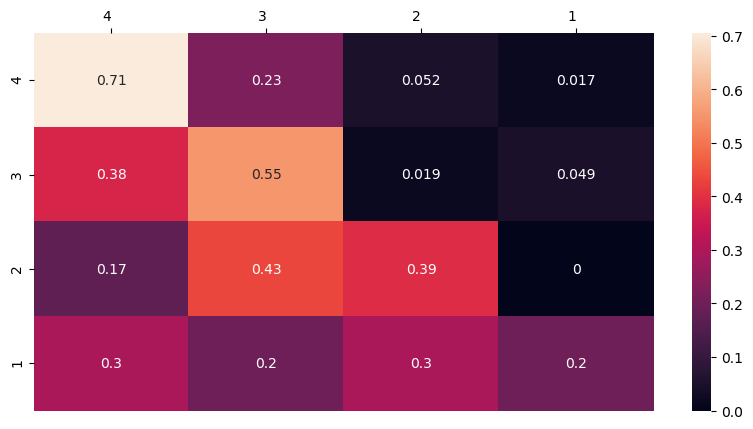

In [24]:
import seaborn as sns
plt.figure(figsize=(10,5))
chart = sns.heatmap(conf_mp_df, annot=True)
chart.xaxis.tick_top()
c_plot = plt.xticks(rotation=360, horizontalalignment='right', fontweight='light')

In [25]:
oi_tuples = iomoves_thin_success_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(func=make_pairs,stride=2,column_name='success_level')
oi_tuples_df = pd.DataFrame(oi_tuples).reset_index().rename({0:'oi_moves'},axis=1)
flat_oi_moves_l = [item for sublist in oi_tuples_df['oi_moves'].values for item in sublist]
flat_oi_moves_df = pd.DataFrame(flat_oi_moves_l).rename({0:'oi_moves_in',1:'oi_moves_out'},axis=1)
conf_m2 = confusion_matrix(flat_oi_moves_df['oi_moves_in'], flat_oi_moves_df['oi_moves_out'],labels=labels)
conf_m2_df = pd.DataFrame(conf_m2, index=labels, columns=labels)
conf_mp2_df = (conf_m2_df.T /conf_m2_df.T.sum()).T
conf_mp2_df

,4,3,2,1
4,0.652893,0.272727,0.049587,0.024793
3,0.417910,0.492537,0.044776,0.044776
2,0.357143,0.428571,0.142857,0.071429
1,0.285714,0.285714,0.428571,0.000000


In [26]:
iomoves_thin_success_df['success_level'].value_counts(normalize=True)*100

4    56.278027
3    32.286996
2     7.623318
1     3.811659
Name: success_level, dtype: float64

In [27]:
iomoves_thin_success_df['success_level'].value_counts()

4    251
3    144
2     34
1     17
Name: success_level, dtype: int64

In [28]:
t14 = iomoves_thin_success_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(count_pairs,column_name='success_level').to_numpy()
t13 = iomoves_thin_success_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(count_pairs,column_name='success_level',end='3').to_numpy()
t24 = iomoves_thin_success_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(count_pairs,column_name='success_level',start='2').to_numpy()
t23 = iomoves_thin_success_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(count_pairs,column_name='success_level',start='2', end='3').to_numpy()

In [29]:
t_14 = [c for t in t14 for c in t]
t_13 = [c for t in t13 for c in t]
t_24 = [c for t in t24 for c in t]
t_23 = [c for t in t23 for c in t]

In [30]:
print(t_14,t_13,t_24,t_23)

[3, 4, 1, 1, 1, 3] [3, 3, 1, 1, 2] [2, 3, 1, 3, 2, 2, 2, 4, 1, 2, 1] [1, 4, 1, 2, 1, 1, 1, 2, 1, 4, 1]


In [31]:
for t in [t_14,t_13,t_24,t_23]:
    print(np.mean(t))

2.1666666666666665
2.0
2.090909090909091
1.7272727272727273


In [32]:
from scipy import stats

(array([3., 0., 0., 0., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

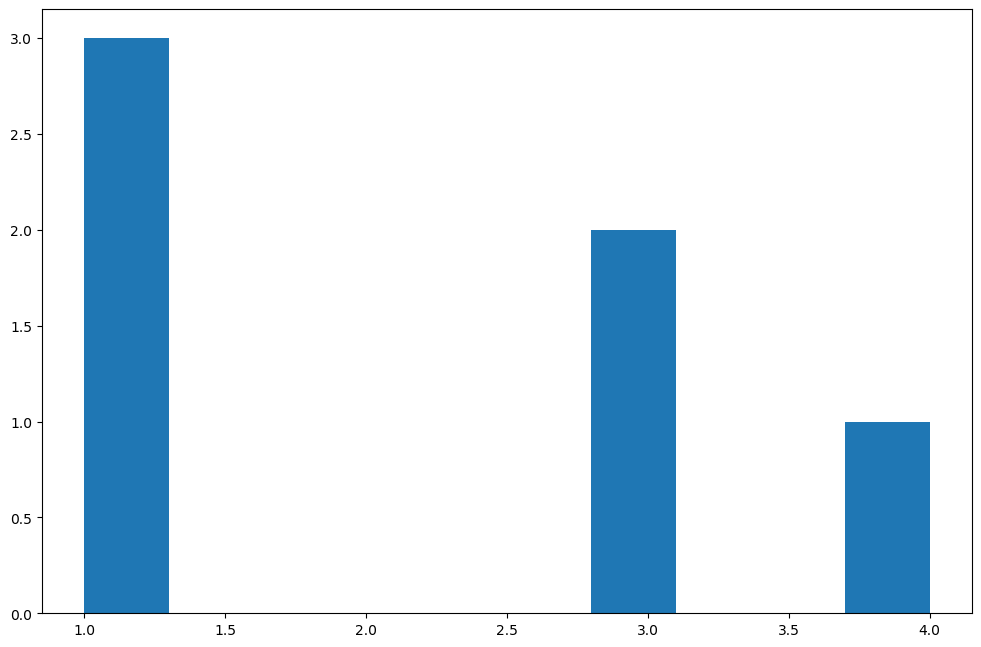

In [33]:
plt.hist(t_14, bins=10)

In [34]:
dist = getattr(stats, 'fisk')
parameters = dist.fit(t_14)
print(parameters)

(0.2003132613544416, 0.9999999999999999, 0.24523431446124155)


In [35]:
stats.kstest(t_14, 'fisk',parameters)

KstestResult(statistic=0.49915667949832326, pvalue=0.06634592109080599)

### What are the probabilities of the second move.

#### Example : Given my stochastic matrix what is the probability an (Very/Moderate) unsuccessful  to become (Very/Extreme) successfull  in TWO moves? 

In [36]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 2),index=labels, columns=labels)

,4,3,2,1
4,0.596918,0.309818,0.066623,0.026641
3,0.494497,0.409759,0.052605,0.043139
2,0.355323,0.449946,0.170609,0.024122
1,0.399463,0.348744,0.196882,0.054911


### What are the probabilities of the third move.

In [37]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 3),index=labels, columns=labels)

,4,3,2,1
4,0.557837,0.340313,0.071132,0.030719
3,0.525962,0.369736,0.067208,0.037094
2,0.457850,0.408103,0.101218,0.032828
1,0.464465,0.379630,0.121067,0.034839


### What are the probabilities of the fourth move.

In [38]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 4),index=labels, columns=labels)

,4,3,2,1
4,0.543830,0.351154,0.072678,0.032337
3,0.533723,0.359820,0.071969,0.034488
2,0.504853,0.379632,0.081199,0.034316
1,0.502792,0.374398,0.089360,0.033451


### What are the probabilities of the fifth (converge) move.

In [39]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 5),index=labels, columns=labels)

,4,3,2,1
4,0.538813,0.354992,0.073251,0.032944
3,0.535488,0.357631,0.073261,0.033620
2,0.524184,0.366065,0.075704,0.034047
1,0.521908,0.366079,0.078429,0.033584


### Expected steps needed to reach from one state to another.

#### Example : How many expected steps we need to get from 1 to 4?

In [40]:
conf_esteps_dt = (1/conf_mp_df)
conf_esteps_dt.iloc[2,3] = 0
conf_esteps_dt.round(2)

,4,3,2,1
4,1.42,4.44,19.22,57.67
3,2.64,1.81,51.50,20.60
2,5.75,2.30,2.56,0.00
1,3.33,5.00,3.33,5.00


In [41]:
import pydtmc as dtmc
conf_mp_df.to_numpy()
mc = dtmc.MarkovChain(conf_mp_df.to_numpy(), labels)
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           4
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        NO
 REVERSIBLE:     NO
 SYMMETRIC:      NO



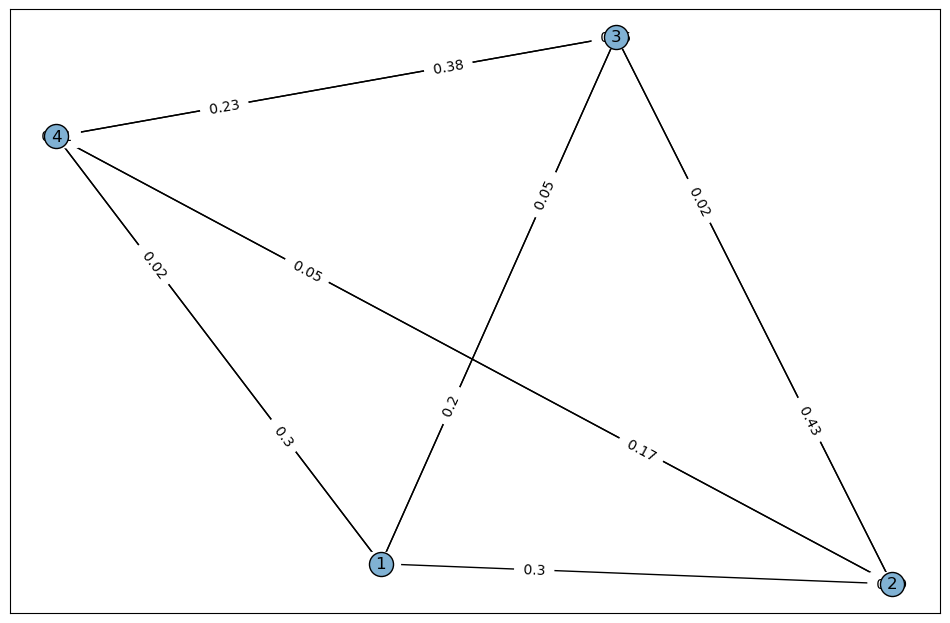

In [42]:
dtmc.plot_graph(mc)